# **Smartphone Dataset Analysis**

### *By Khalil De Vera*

We provide some analysis for the [**smartphones-dataset**](https://www.kaggle.com/datasets/informrohit1/smartphones-dataset/data) of Kaggle.

# **Overview**

For this dataset, we seek to answer the following questions:

**Best and Worst** phone brands in terms of average:
* Price
* Rating
* Speed
* Battery Capacity
* Charging Capacity
* RAM Capacity
* Memory
* Screen Size (Height, Width, Diagonal)
* Refresh Rate
* Extended Memory
* Resolution Size

**Trends and Relationship** of specs in terms of:
* Price vs. Screen Size
* Price vs. Battery Capacity
* Price vs. Rating
* Price vs. Speed
* Price vs. OS
* Price vs. NFC-Enabled
* Price vs. 5G-Enabled
* Battery vs. Memory
* Battery vs. Screen Size
* Battery vs. Speed
* Battery vs. Rating
* OS vs. Speed
* OS vs. Rating
* OS vs. Battery

**Specs Distribution** of the following:
* Price Distribution
* Rating Distribution
* Speed Distribution
* Battery Distribution

**Some Interesting Plot of Android vs. Apple**
* Price
* 

# **Exploratory Data Analysis**

We provide a detailed step-by-step procedure for the analysis of the dataset.



## Import Libraries

First, we import the most common Python libraries for Data Visualization: `Pandas`, `Seaborn`, and `Matplotlib.pyplot`.

In [384]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

print("Libraries are successfully imported.")

Libraries are successfully imported.


## Importing the Dataset

We import the [**smartphones-dataset**](https://www.kaggle.com/datasets/informrohit1/smartphones-dataset/data) of Kaggle.

In [364]:
smartphonedata_filepath = "/kaggle/input/smartphones-dataset/smartphones_cleaned_v6.csv"

phone_data = pd.read_csv("/kaggle/input/smartphones-dataset/smartphones_cleaned_v6.csv")

phone_data.head()
phone_data.dropna()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,8.0,1,1024.0,1080,2408
10,realme,Realme 10 Pro,18999,82.0,True,False,False,snapdragon,8.0,2.20,...,120,2,1.0,android,108.0,16.0,1,1024.0,1080,2400
13,vivo,Vivo T1 5G (6GB RAM + 128GB),16990,80.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,realme,Realme Narzo 20,10499,72.0,False,False,False,helio,8.0,2.00,...,60,3,1.0,android,48.0,8.0,1,256.0,720,1600
961,oppo,OPPO A58x,13990,72.0,True,False,False,dimensity,8.0,2.20,...,90,2,1.0,android,13.0,8.0,1,1024.0,720,1612
962,doogee,Doogee S99,14999,84.0,False,True,False,helio,8.0,2.05,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2340
970,realme,Realme Narzo 50i Prime (4GB RAM + 64GB),8720,64.0,False,False,False,tiger,8.0,1.82,...,60,1,1.0,android,8.0,5.0,1,1024.0,720,1600


## Overview of the Dataset

We want to have a good sense of what the dataset contains, so we run the following code.

In [365]:
# Size of the Dataset
size = phone_data.shape
print(f'Size: {size}')


# Column Titles of the Dataset
print("\nColumn Titles:")
column_head = list(phone_data.columns)
for column_title in column_head:
    print(f'{column_head.index(column_title)+1}. {column_title} - {phone_data[column_title].dtype}')

# Phone Brands included in the Dataset
print("\nBrand Names:")
phone_data.brand_name.describe()

Size: (980, 26)

Column Titles:
1. brand_name - object
2. model - object
3. price - int64
4. rating - float64
5. has_5g - bool
6. has_nfc - bool
7. has_ir_blaster - bool
8. processor_brand - object
9. num_cores - float64
10. processor_speed - float64
11. battery_capacity - float64
12. fast_charging_available - int64
13. fast_charging - float64
14. ram_capacity - float64
15. internal_memory - float64
16. screen_size - float64
17. refresh_rate - int64
18. num_rear_cameras - int64
19. num_front_cameras - float64
20. os - object
21. primary_camera_rear - float64
22. primary_camera_front - float64
23. extended_memory_available - int64
24. extended_upto - float64
25. resolution_width - int64
26. resolution_height - int64

Brand Names:


count        980
unique        46
top       xiaomi
freq         134
Name: brand_name, dtype: object

# **Best and Worst Phones Analysis**

For this part, we seek to answer the first part of the questions.

We need to group the data first based on `brand_name`.

In [366]:
phone_groups = phone_data.groupby('brand_name')

sns.set_theme(style="whitegrid")

 We provide some figures and plots as necessary.

Details of Price

Mean: 47246.768004921185
Median: 26537.693693693695
Mode: 8990.0
Min: 3940.0
Max: 650000.0


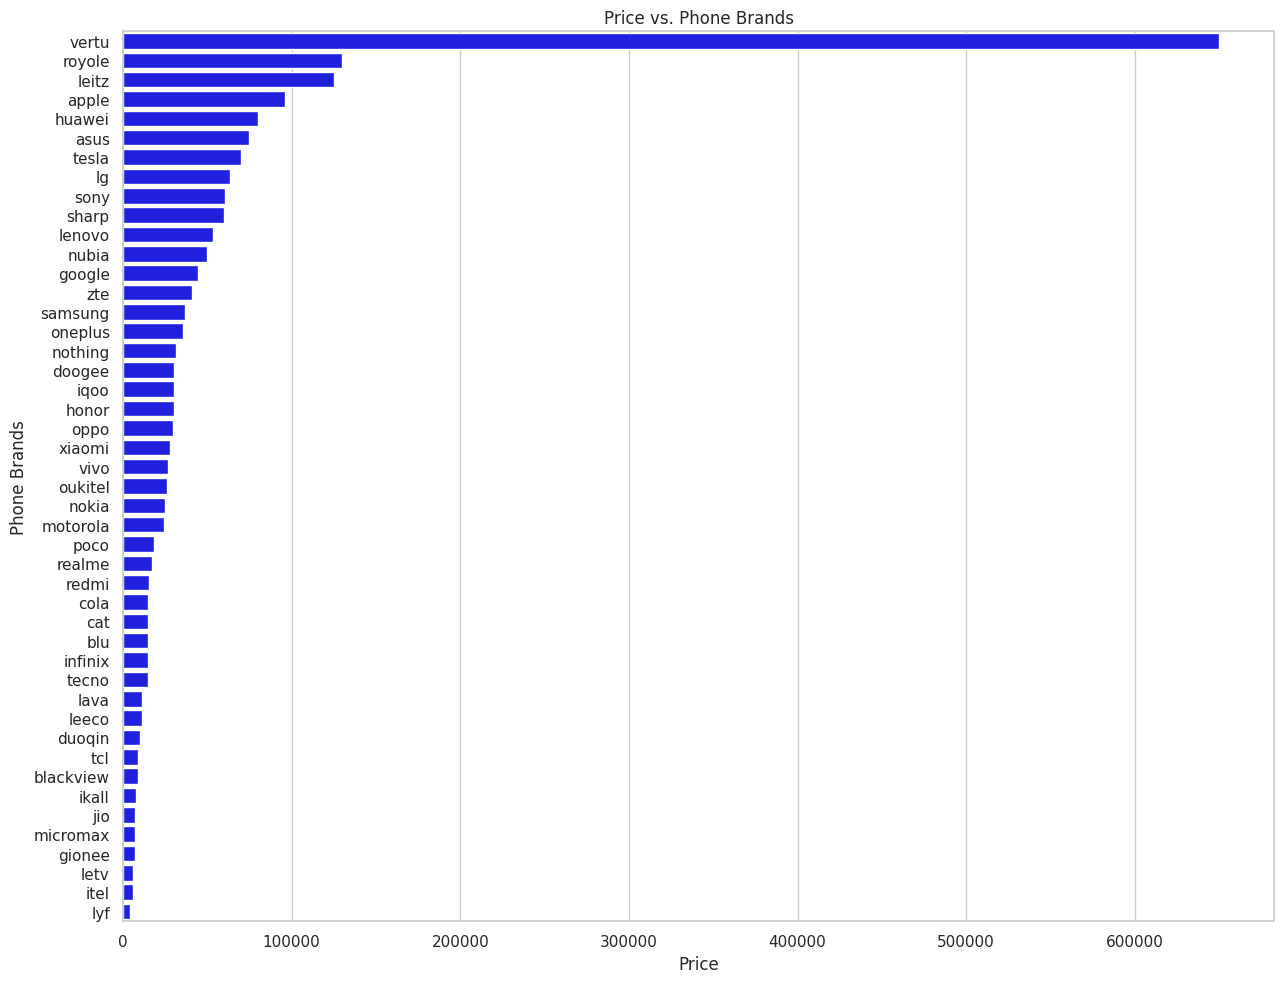

In [367]:
# Price
spec = 'price'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(f'{spec.title()}')
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Rating

Mean: 76.44232918159881
Median: 78.44090909090909
Mode: 60.0
Min: 60.0
Max: 89.0


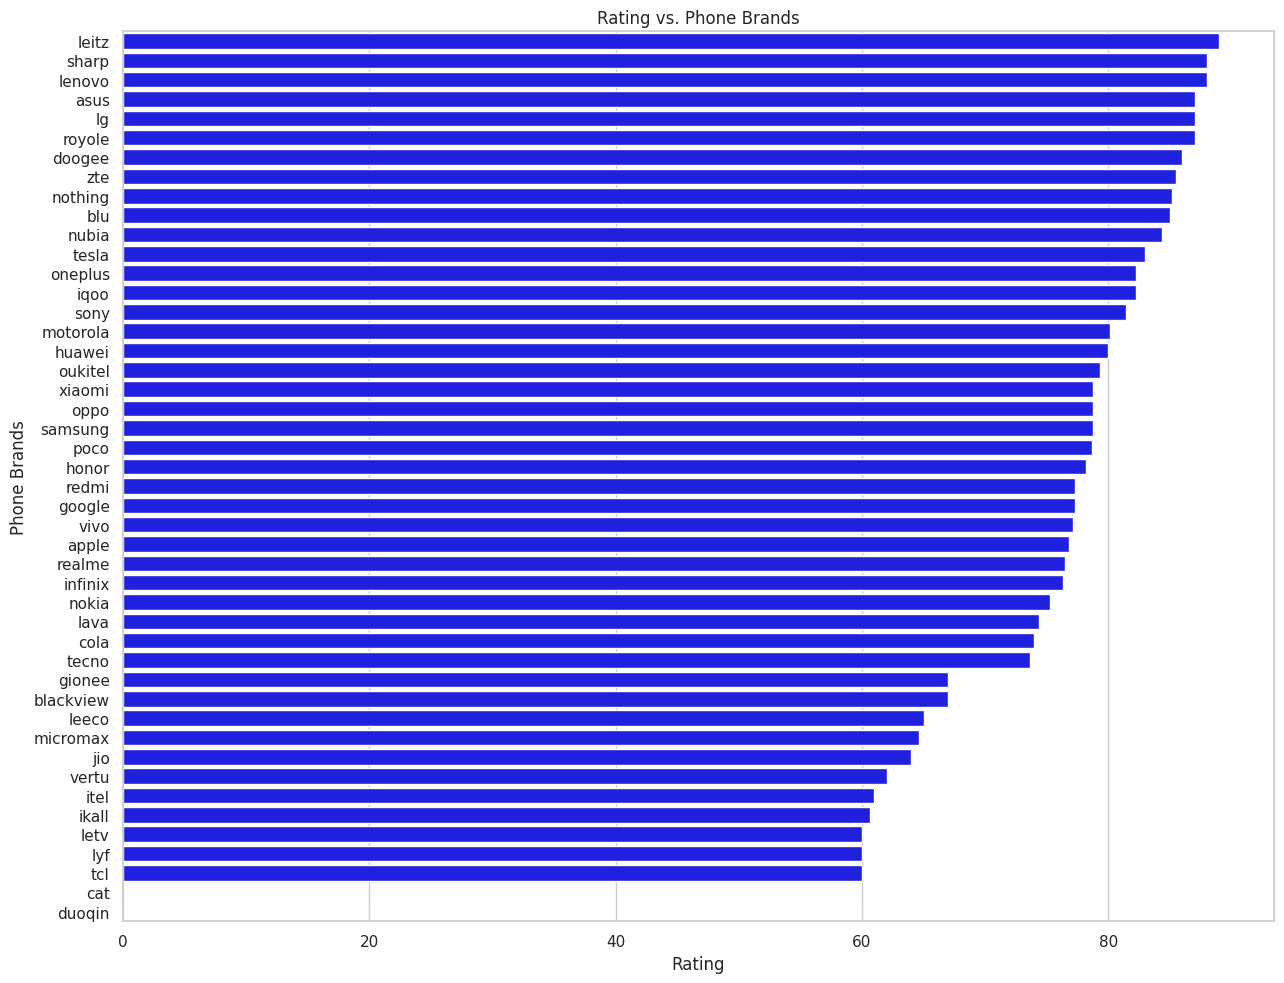

In [368]:
# Rating
spec = 'rating'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Processor_Speed

Mean: 2.3151534196565033
Median: 2.37196261682243
Mode: 1.5
Min: 1.3
Max: 3.1571428571428575


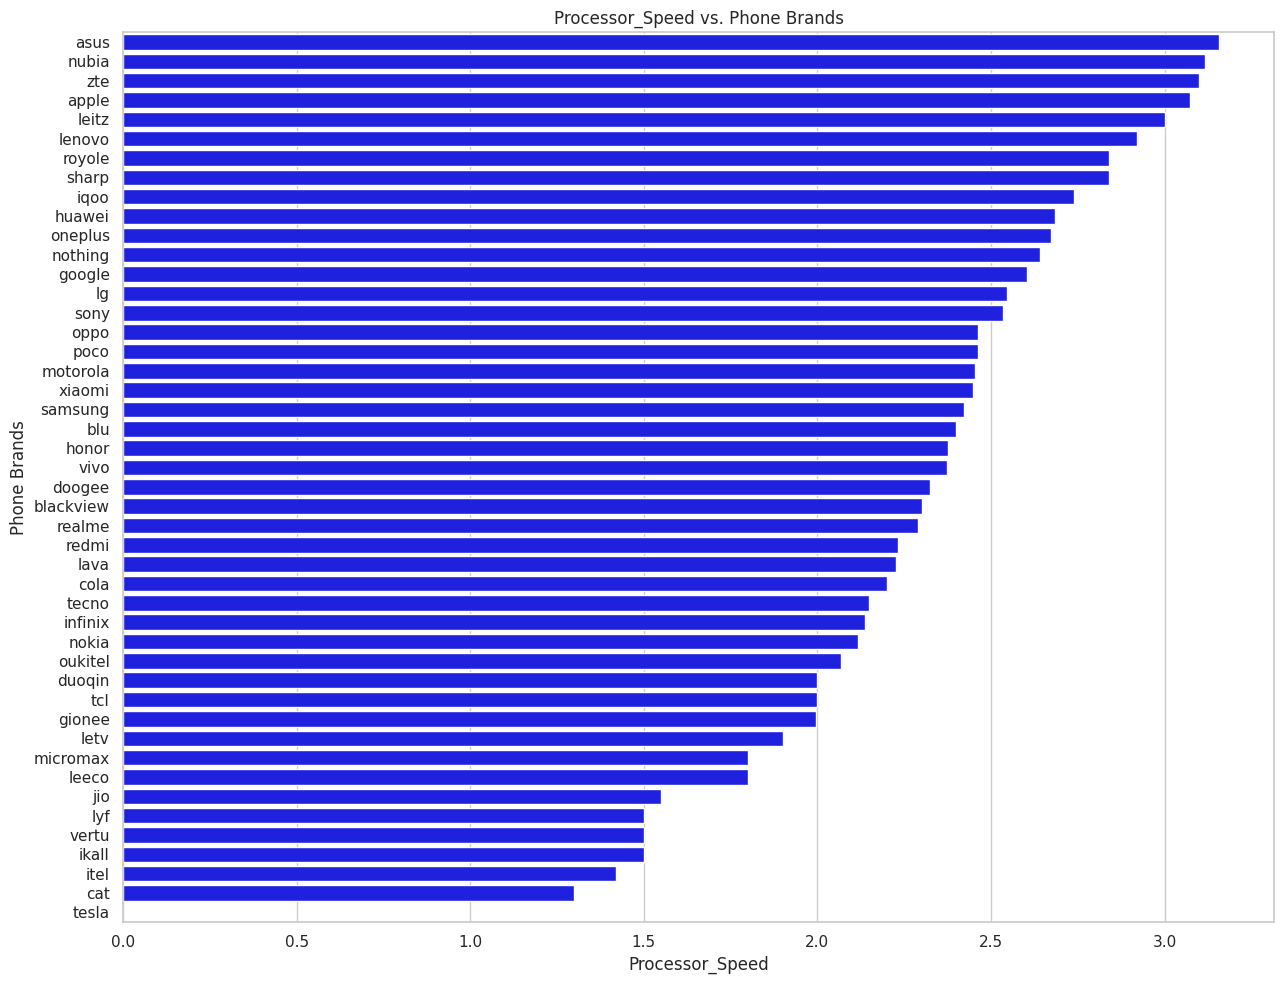

In [369]:
# Speed
spec = 'processor_speed'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')
# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Battery_Capacity

Mean: 4842.445095626053
Median: 4754.761904761905
Mode: 5000.0
Min: 2000.0
Max: 14000.0


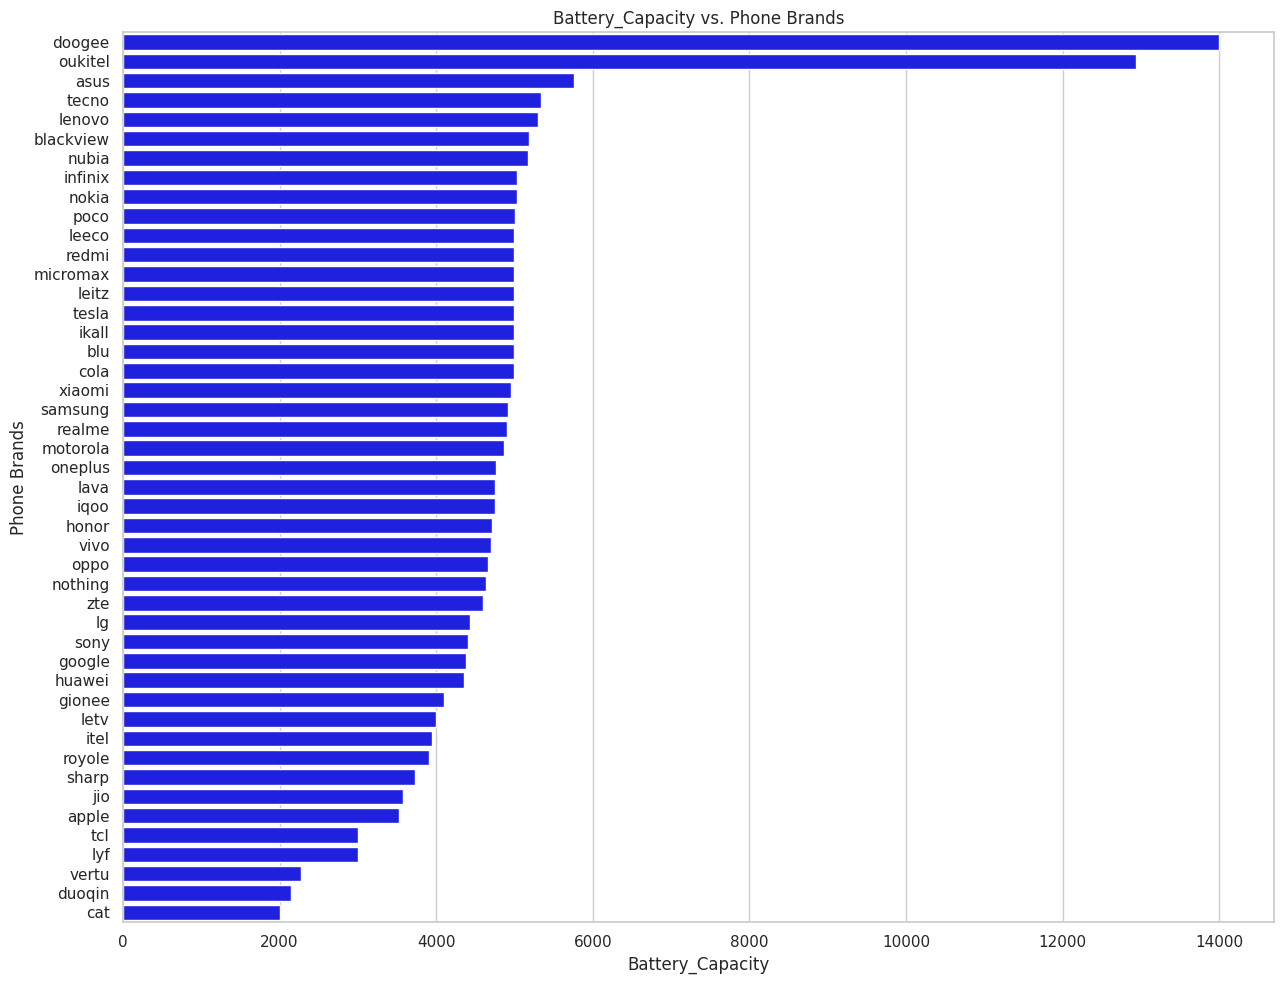

In [370]:
# Battery Capacity
spec = 'battery_capacity'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Fast_Charging

Mean: 44.01745008728314
Median: 41.9125
Mode: 10.0
Min: 10.0
Max: 120.0


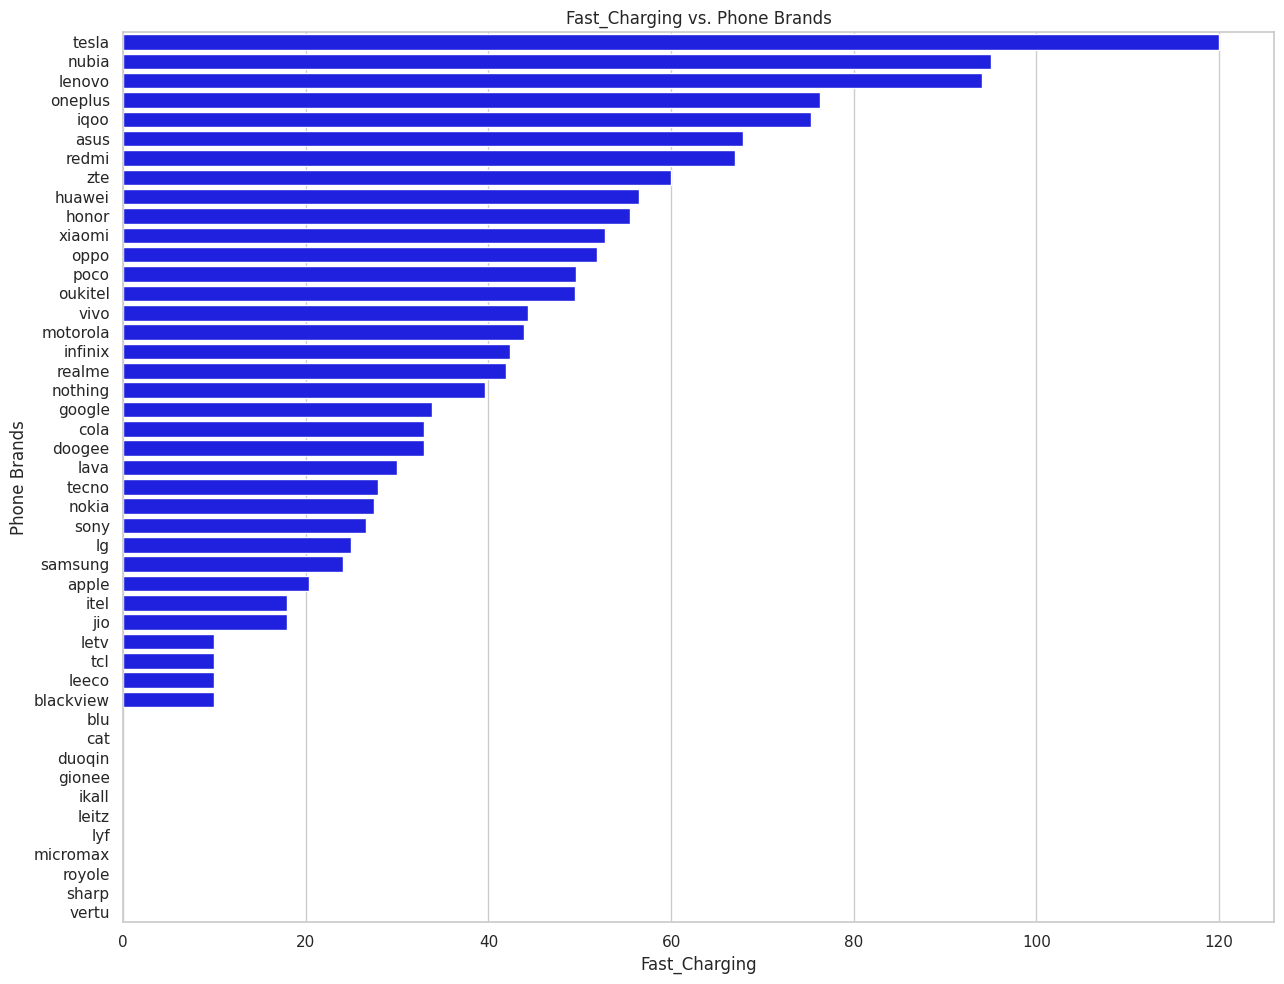

In [371]:
# Charging Capacity
spec = 'fast_charging'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')
# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Ram_Capacity

Mean: 6.767347661558415
Median: 6.448043871551334
Mode: 8.0
Min: 1.8
Max: 16.0


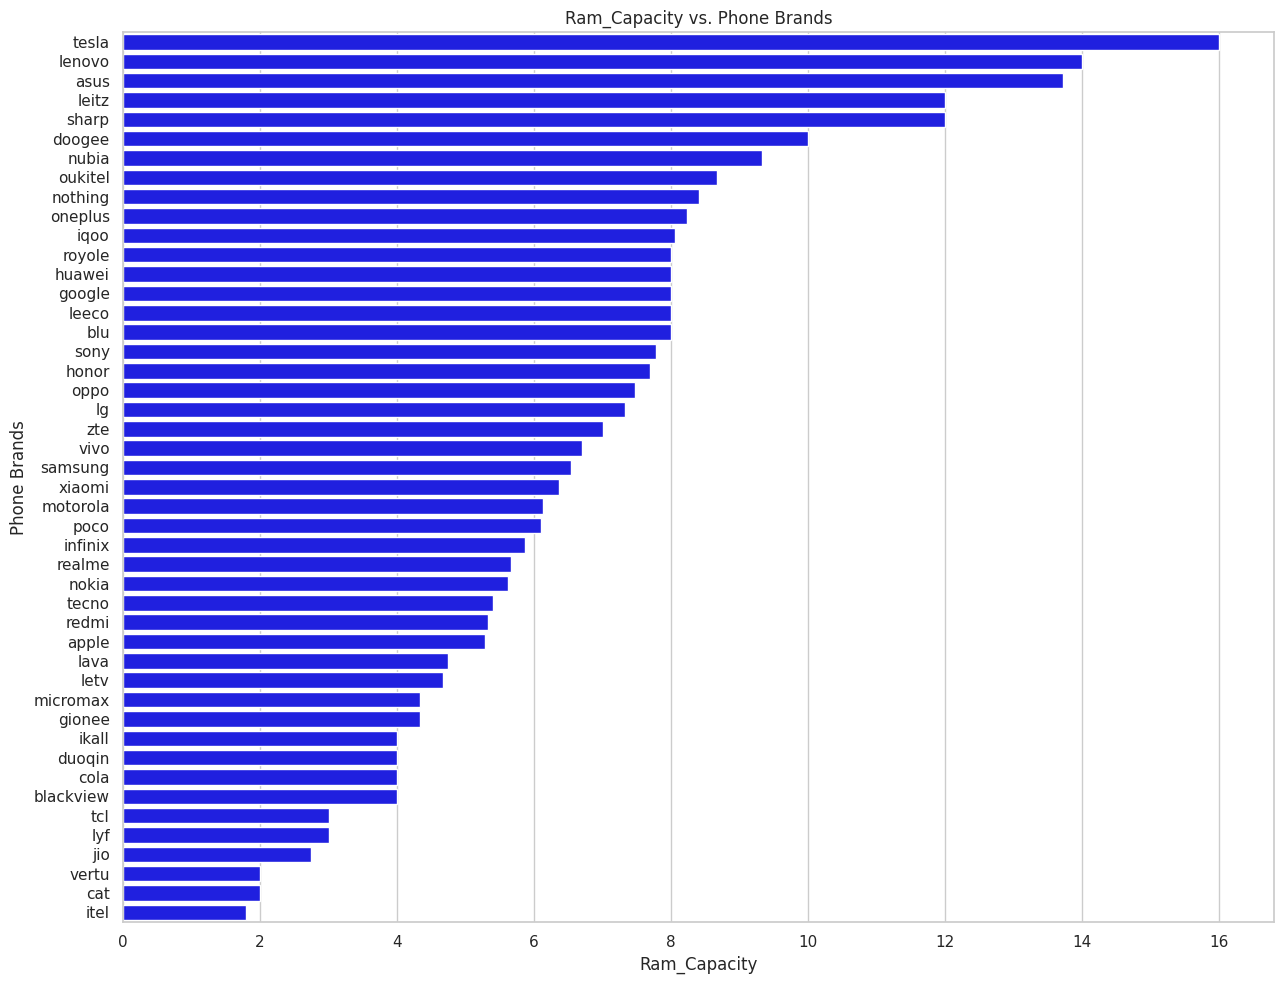

In [372]:
# RAM Capacity
spec = 'ram_capacity'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Internal_Memory

Mean: 142.08350993210212
Median: 128.0
Mode: 64.0
Min: 16.0
Max: 512.0


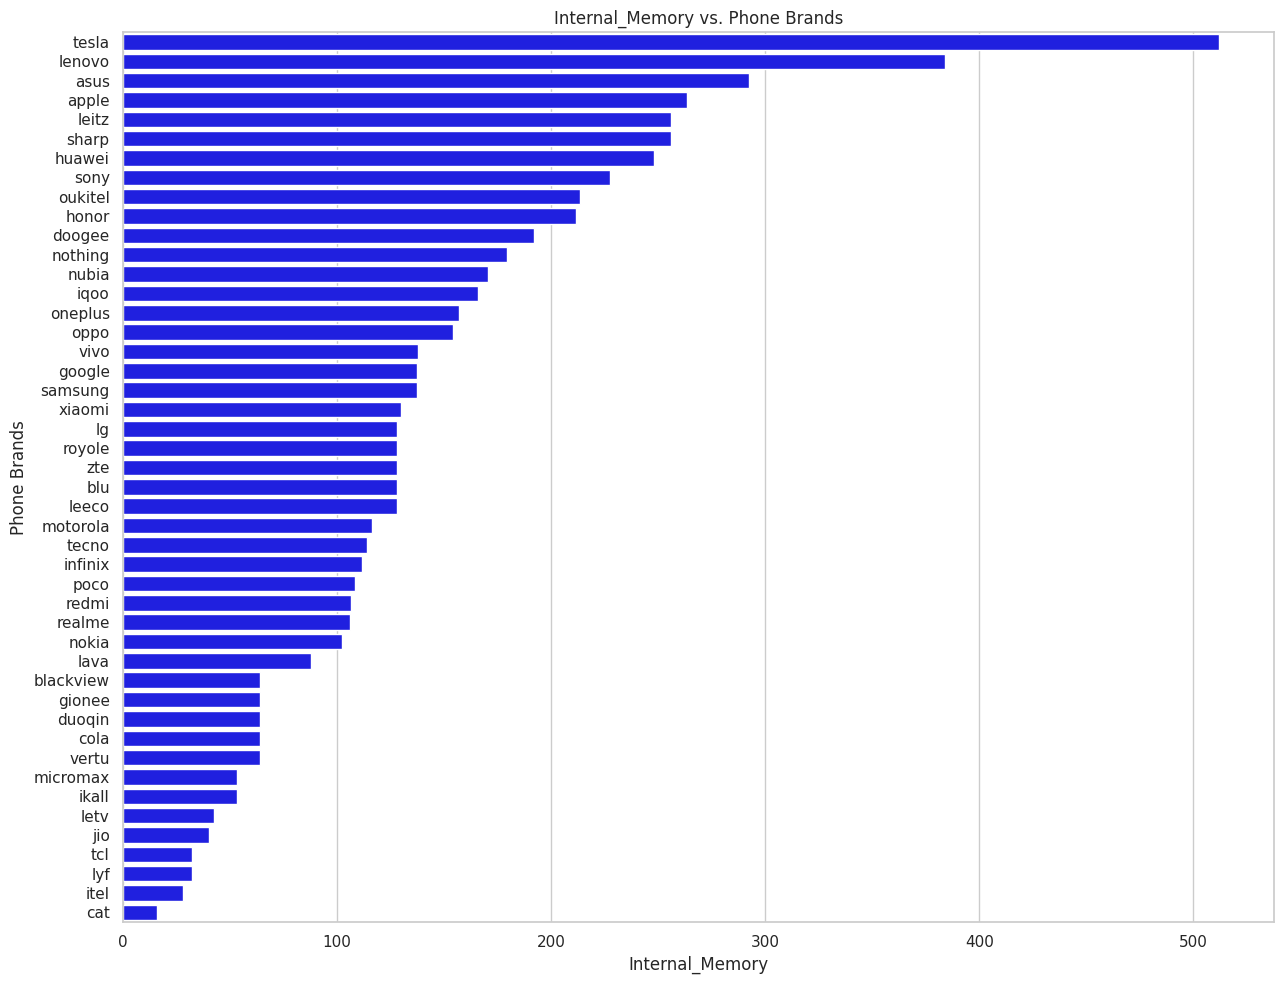

In [373]:
# Memory Capacity
spec = 'internal_memory'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Screen_Size

Mean: 6.347897867991598
Median: 6.5606060606060606
Mode: 6.5
Min: 3.54
Max: 7.5


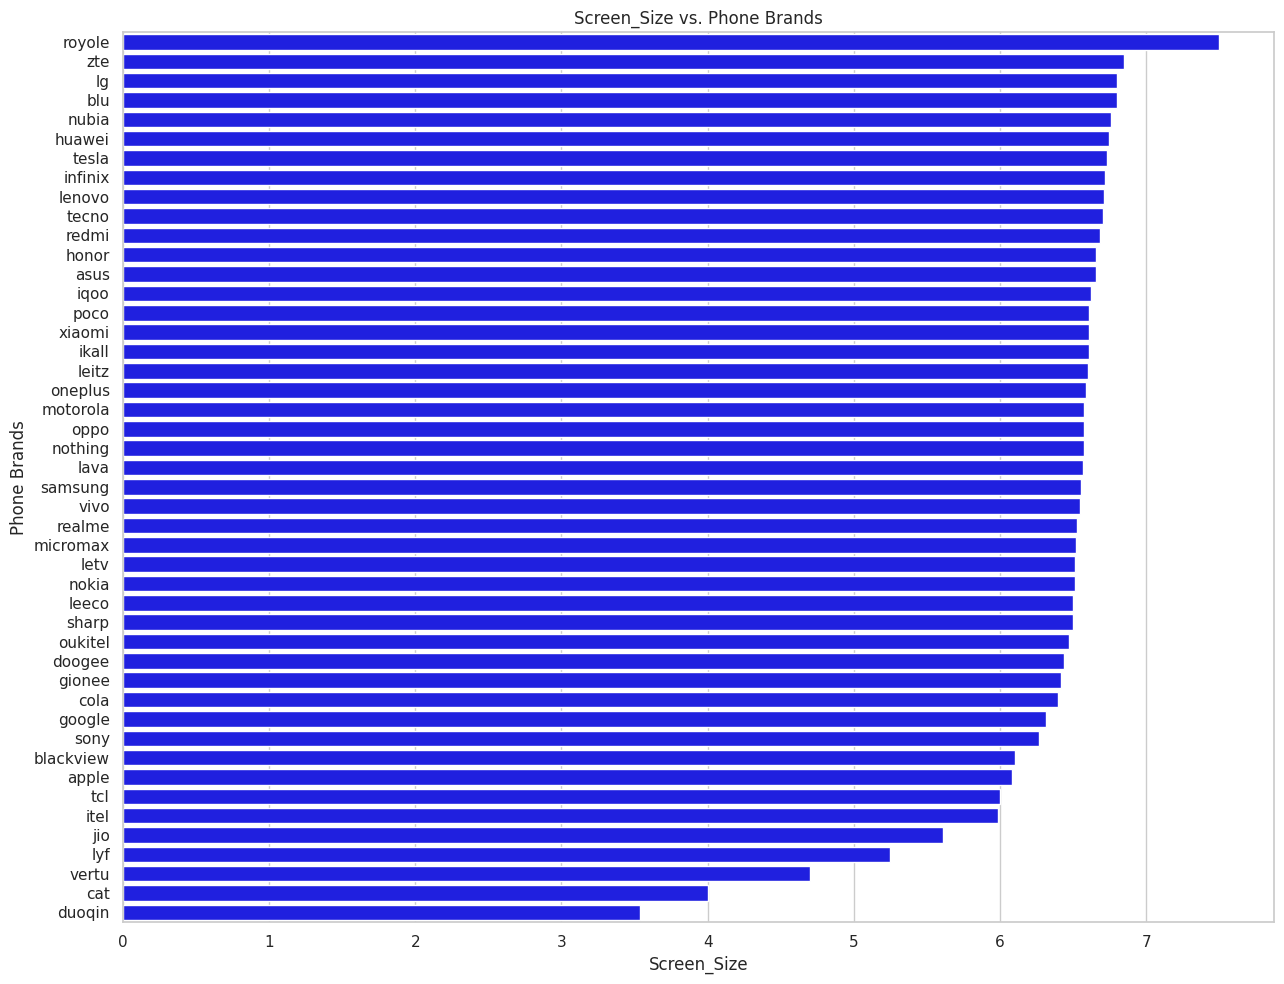

In [374]:
# Screen Size
spec = 'screen_size'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Refresh_Rate

Mean: 90.08794410472576
Median: 87.47727272727272
Mode: 60.0
Min: 60.0
Max: 240.0


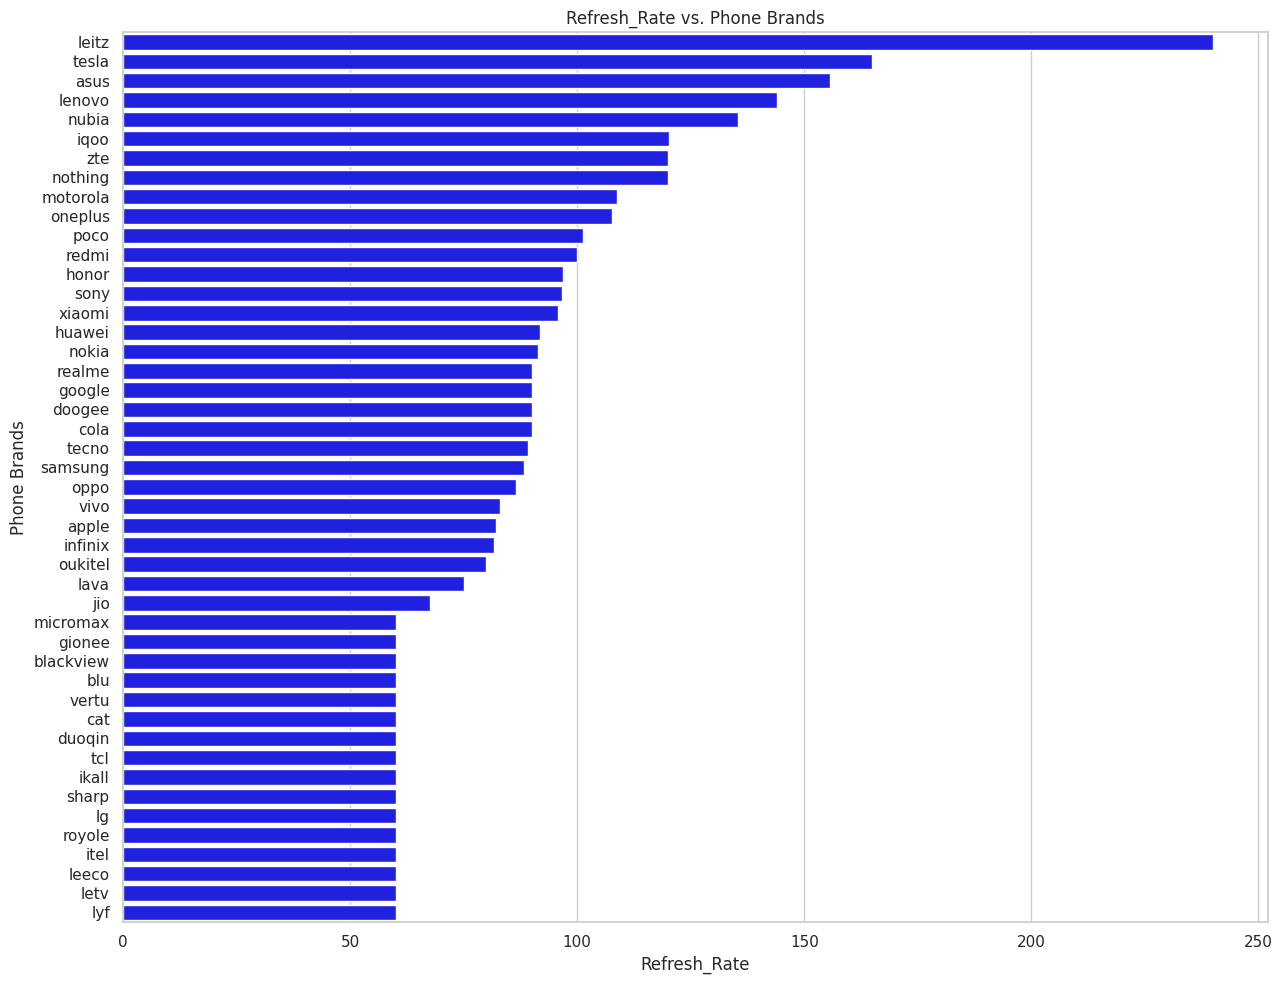

In [375]:
# Refresh Rate
spec = 'refresh_rate'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Extended_Memory_Available

Mean: 0.5891054172671852
Median: 0.6852134146341464
Mode: 1.0
Min: 0.0
Max: 1.0


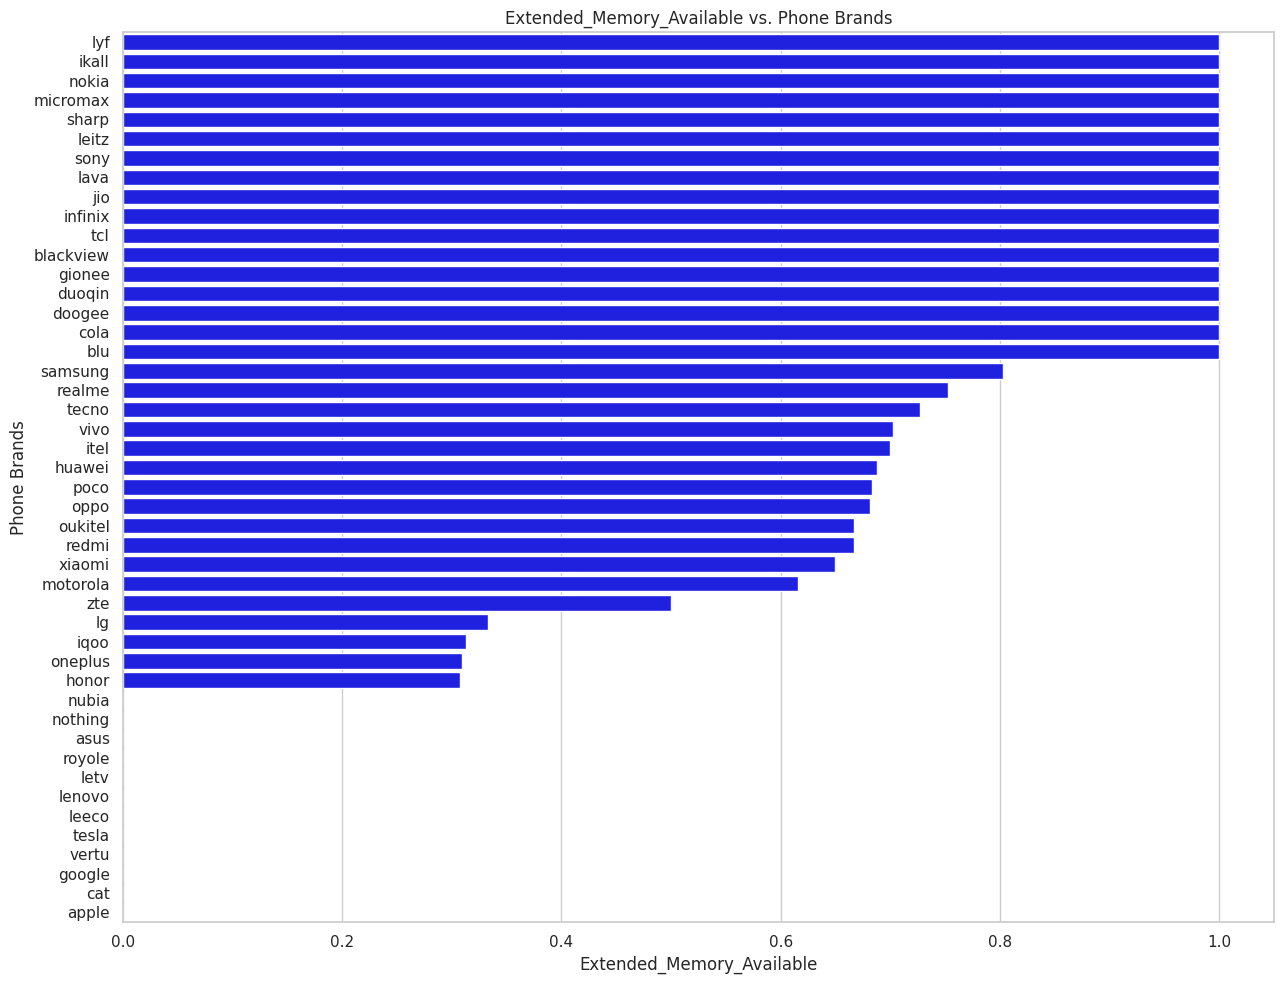

In [376]:
# Extended Memory
spec = 'extended_memory_available'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Resolution_Height

Mean: 2074.035871225048
Median: 2169.476605868358
Mode: 1920.0
Min: 640.0
Max: 3168.0


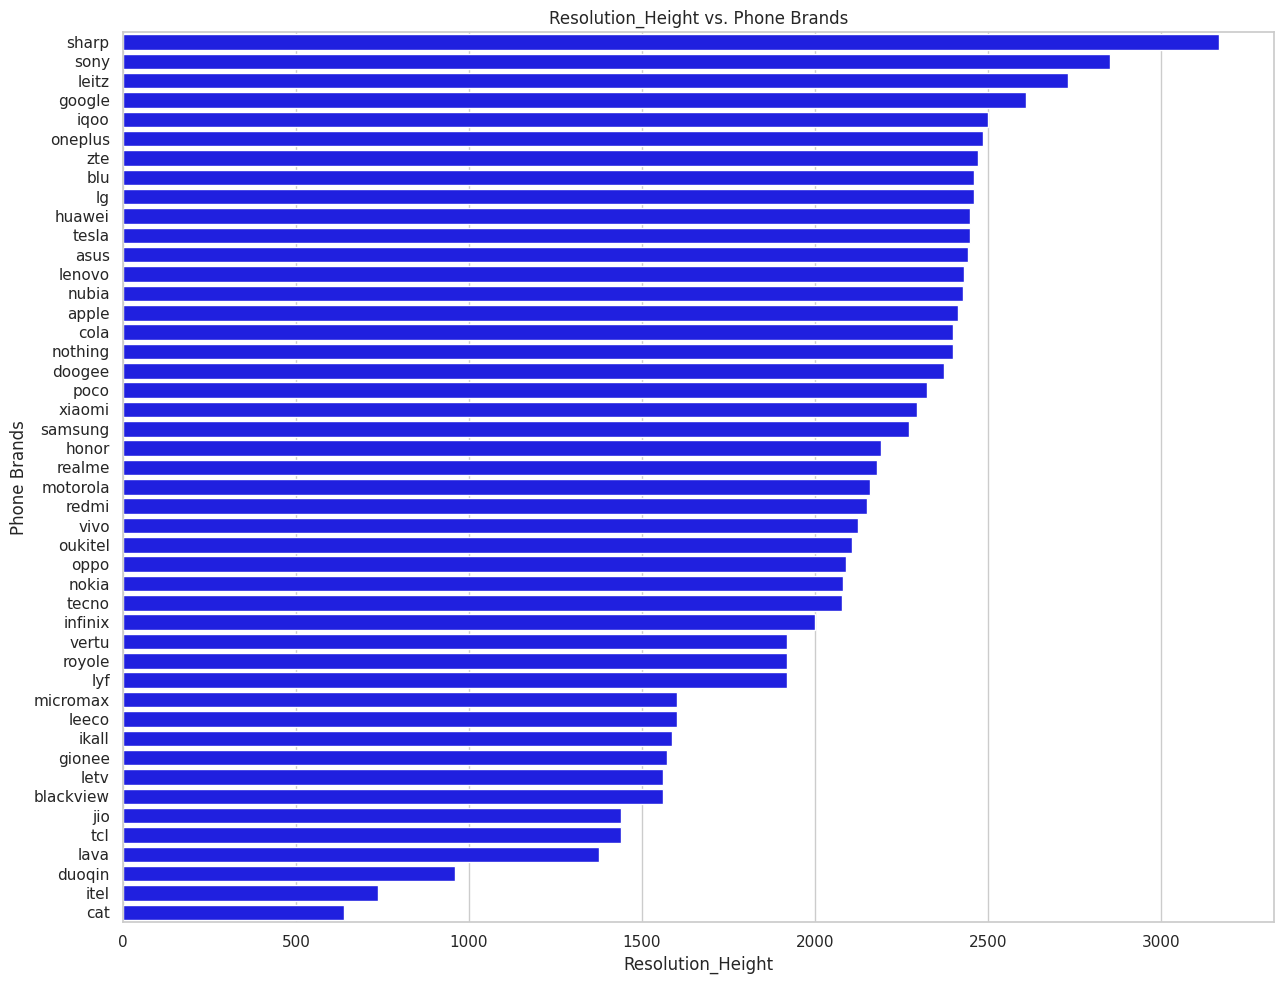

In [377]:
# Resolution Size (Height)
spec = 'resolution_height'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

Details of Resolution_Height

Mean: 2074.035871225048
Median: 2169.476605868358
Mode: 1920.0
Min: 640.0
Max: 3168.0


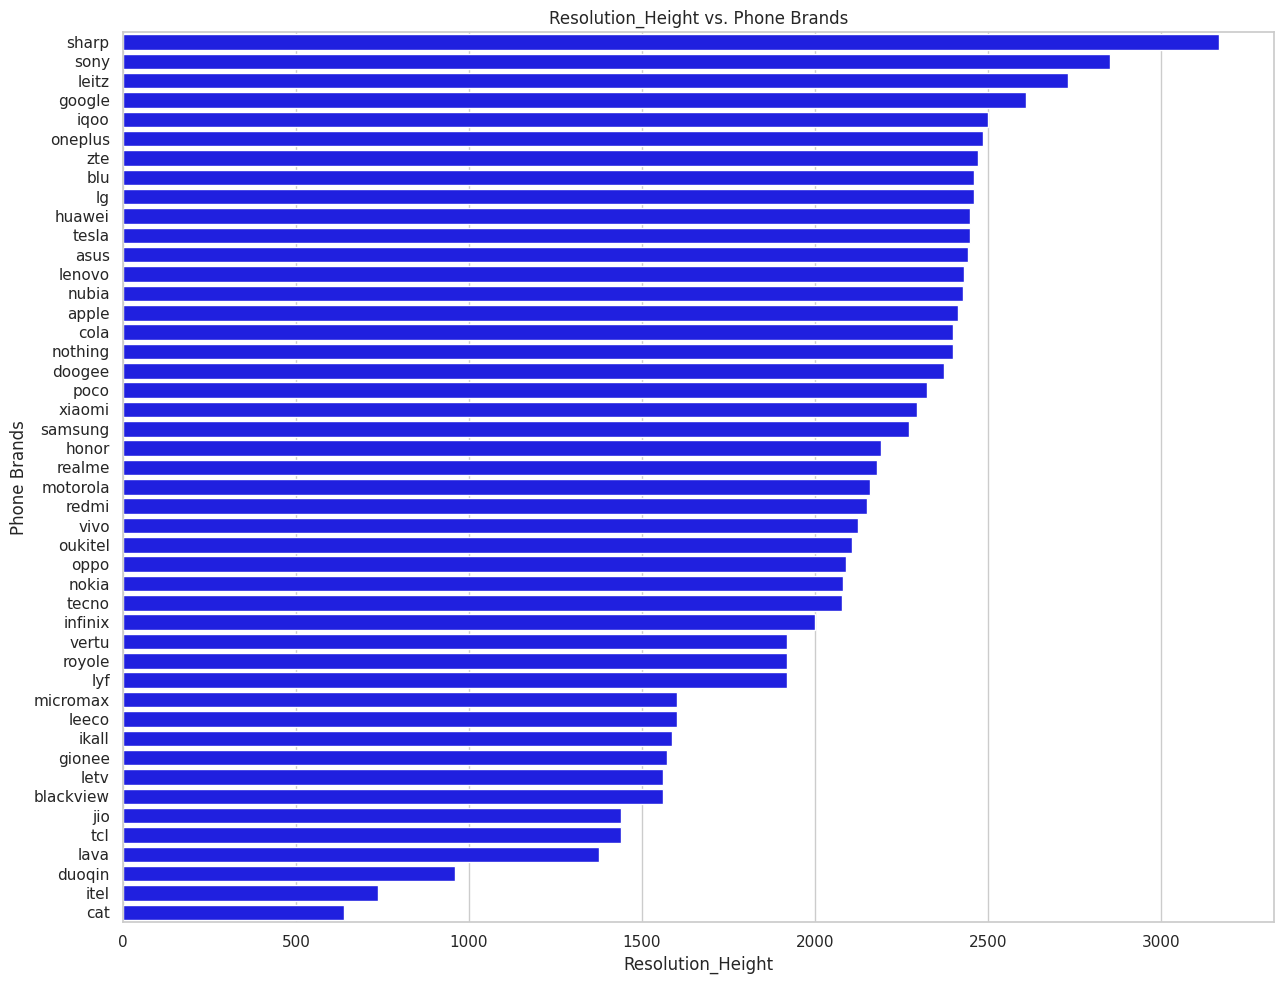

In [378]:
# Resolution Size (Height)
spec = 'resolution_height'
spec_phone = phone_groups[spec].mean().sort_values(ascending=False).reset_index()

# Summary Stats
print(f'Details of {spec.title()}\n')
print(f'Mean: {spec_phone[spec].mean()}')
print(f'Median: {spec_phone[spec].median()}')
print(f'Mode: {spec_phone[spec].mode()[0]}')
print(f'Min: {spec_phone[spec].min()}')
print(f'Max: {spec_phone[spec].max()}')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(data=spec_phone, y='brand_name', x=spec, orient='h', color='blue')

# Legends, Axis, and Title
plt.title(f'{spec.title()} vs. Phone Brands')
plt.xlabel(spec.title())
plt.ylabel("Phone Brands")

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()}_Phone Brands.png', dpi=400)

plt.show()

# **Trends and Relationship**

We determine relationships of the specs of the phone models. We provide figures and plots as necessary.

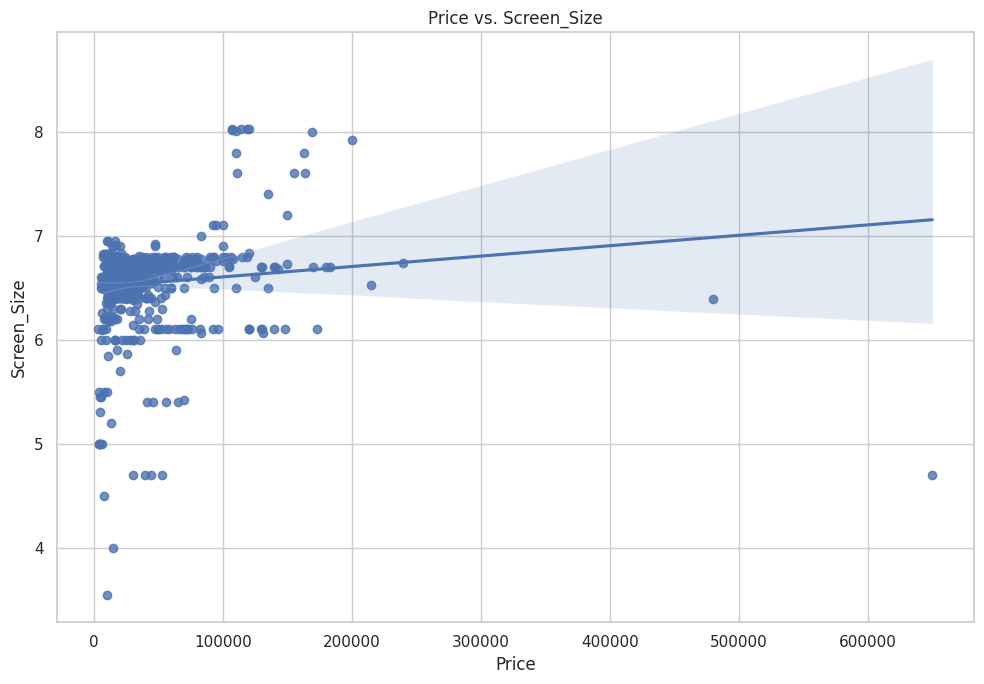

In [379]:
# Price vs. Screen Size
x_var = 'price'
y_var = 'screen_size'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

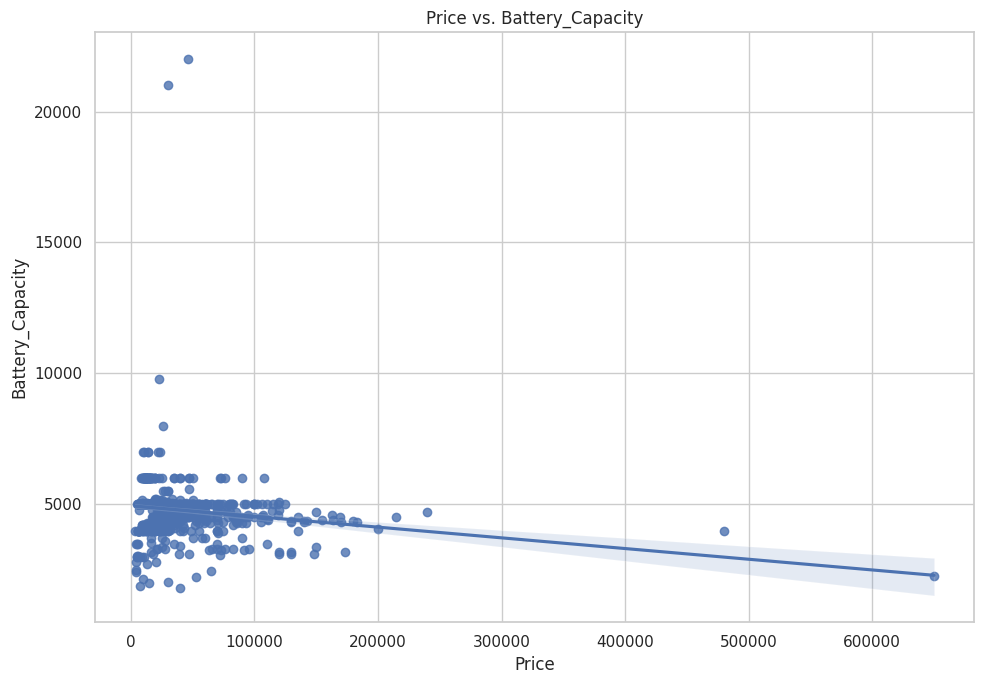

In [380]:
# Price vs. Battery Capacity
x_var = 'price'
y_var = 'battery_capacity'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

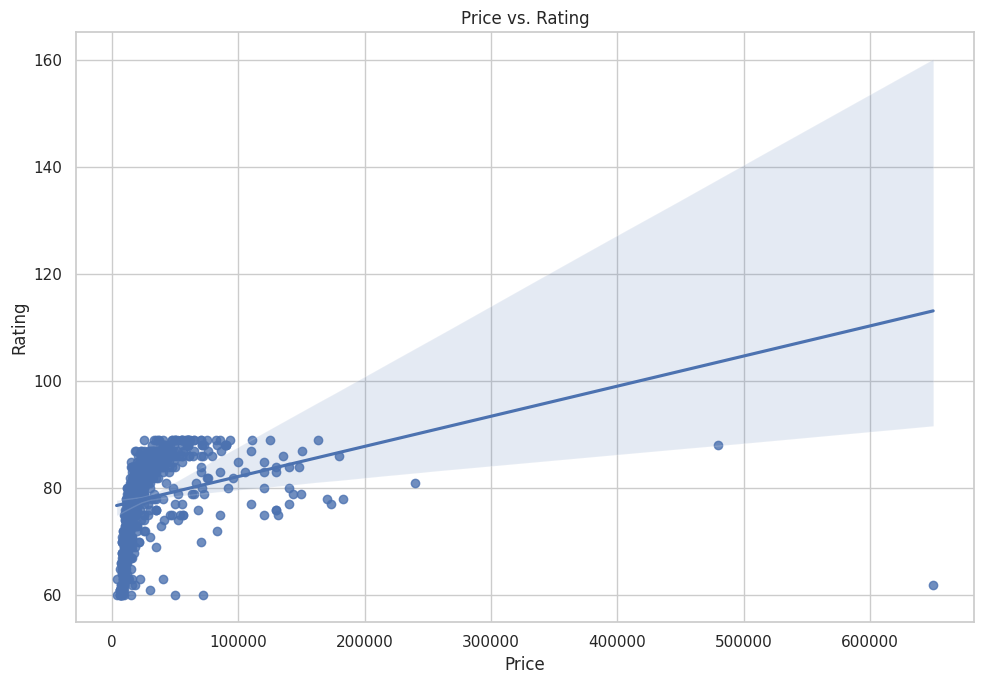

In [381]:
# Price vs. Rating
x_var = 'price'
y_var = 'rating'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

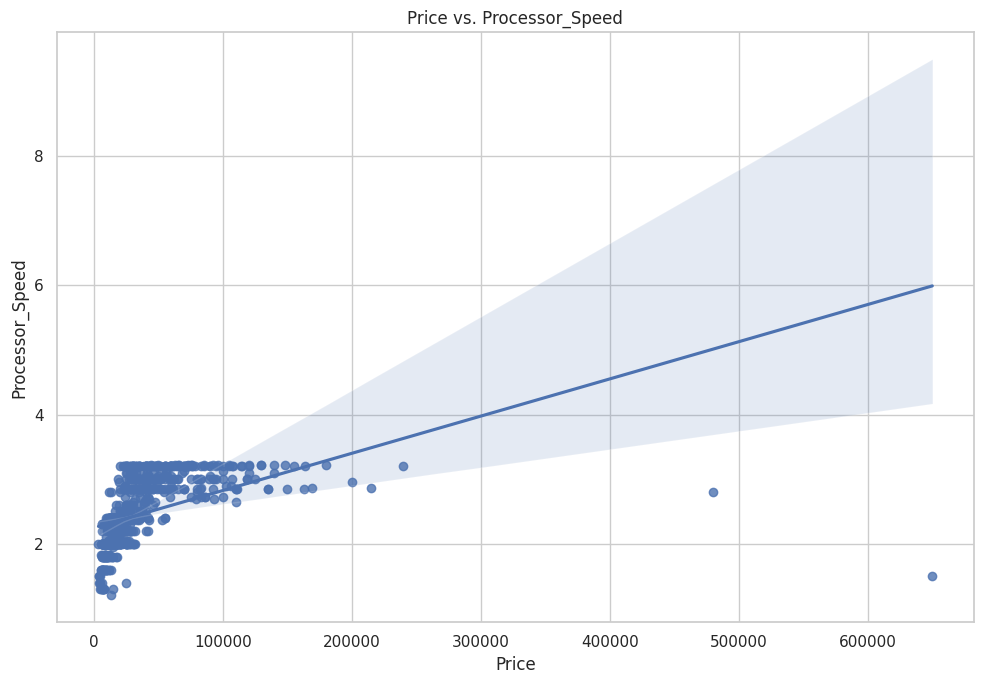

In [382]:
# Price vs. Speed
x_var = 'price'
y_var = 'processor_speed'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

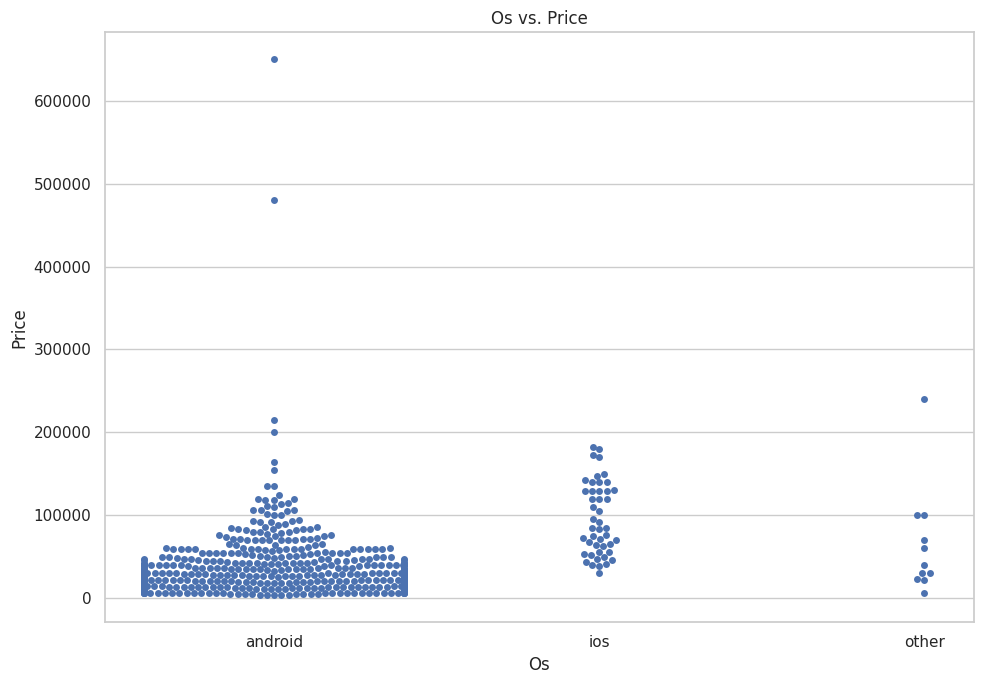

In [387]:
# OS vs. Price
x_var = 'os'
y_var = 'price'

# Plot
plt.figure(figsize=(10,7))
sns.swarmplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

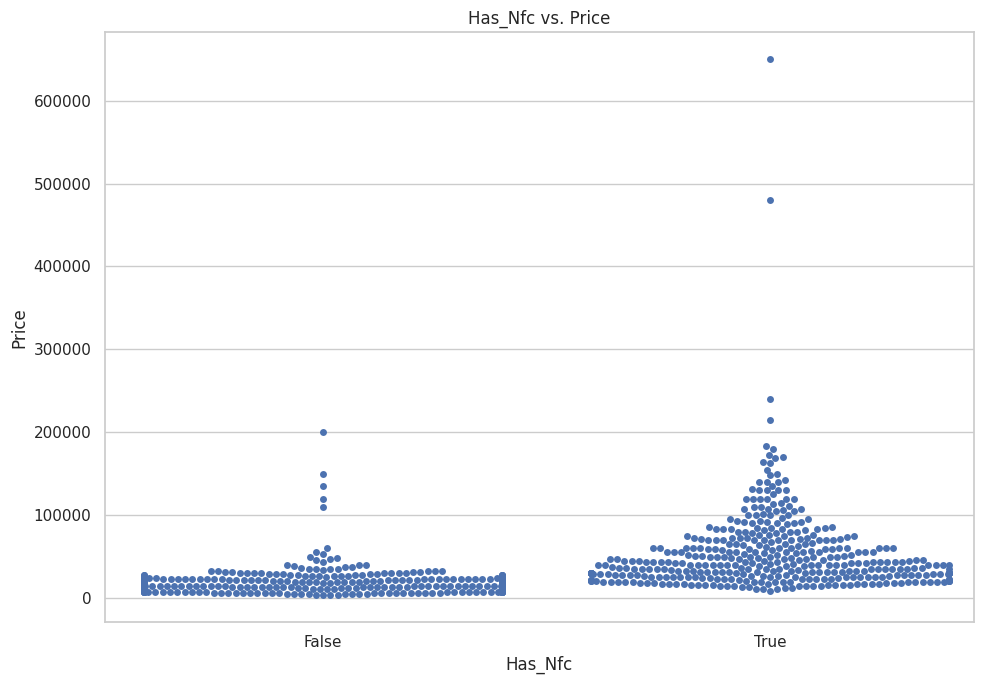

In [389]:
# NFC-Enabled vs. Price
x_var = 'has_nfc'
y_var = 'price'

# Plot
plt.figure(figsize=(10,7))
sns.swarmplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

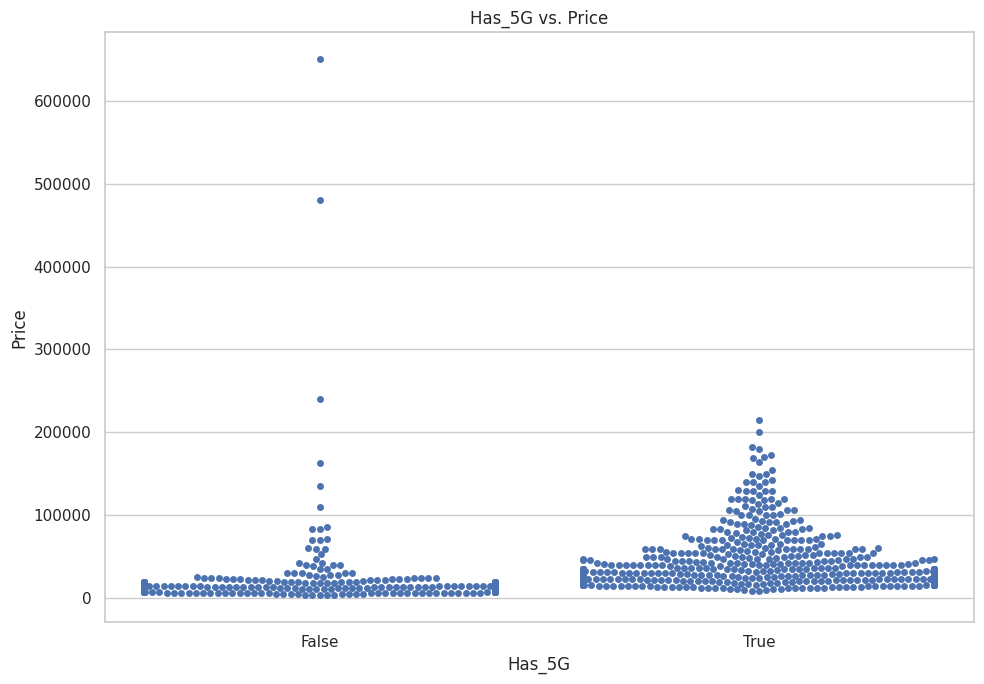

In [390]:
# 5G-Enabled vs. Price
x_var = 'has_5g'
y_var = 'price'

# Plot
plt.figure(figsize=(10,7))
sns.swarmplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

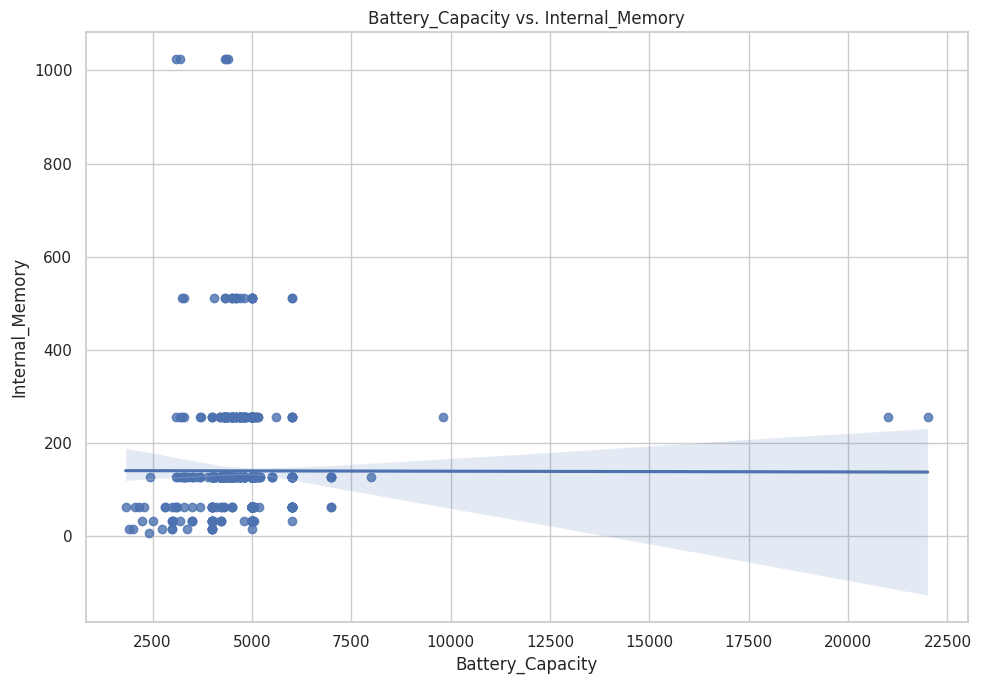

In [391]:
# Battery vs. Memory
x_var = 'battery_capacity'
y_var = 'internal_memory'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

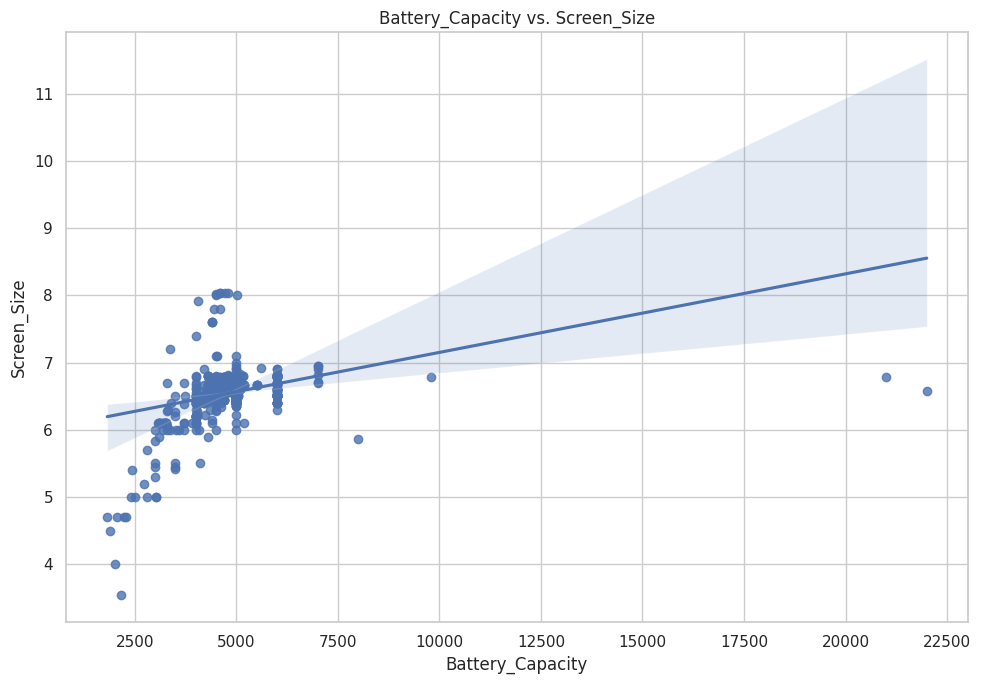

In [392]:
# Battery vs. Memory
x_var = 'battery_capacity'
y_var = 'screen_size'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

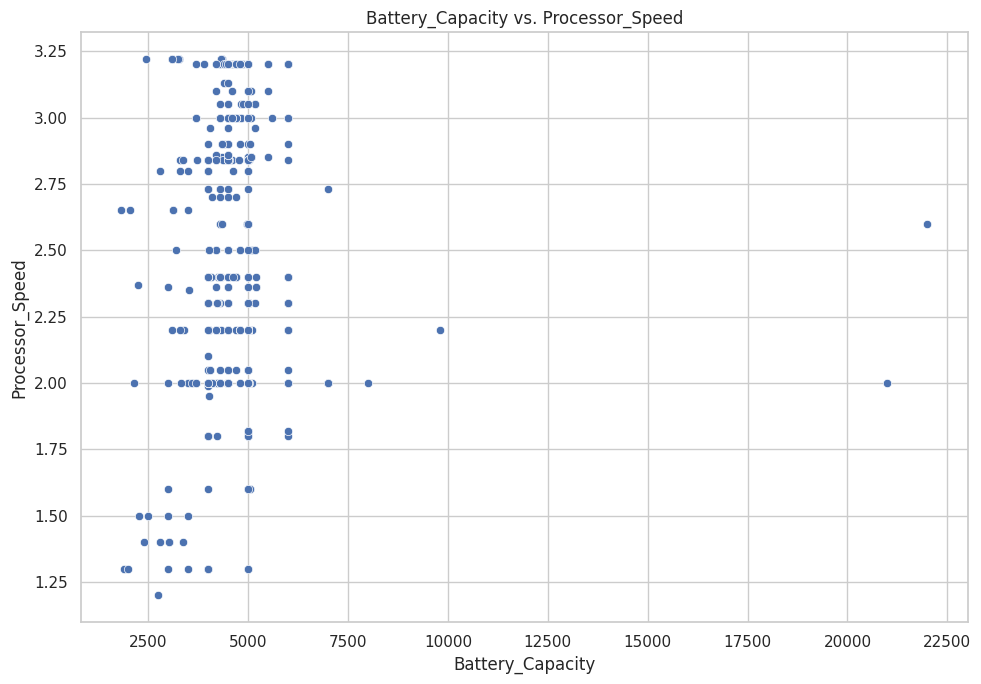

In [394]:
# Battery vs. Speed
x_var = 'battery_capacity'
y_var = 'processor_speed'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

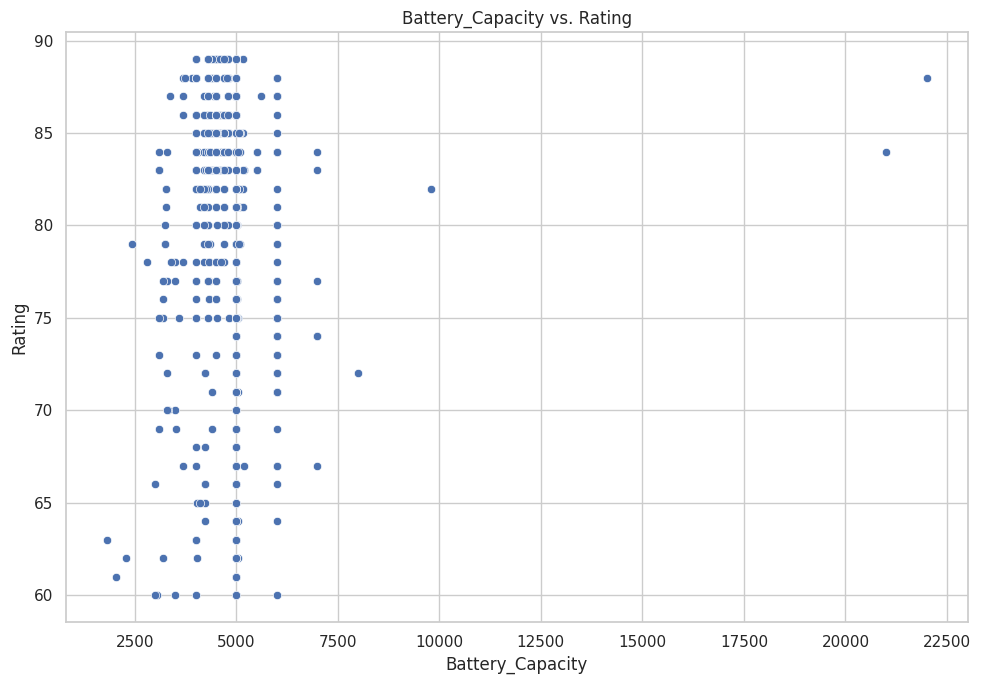

In [395]:
# Battery vs. Rating
x_var = 'battery_capacity'
y_var = 'rating'

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

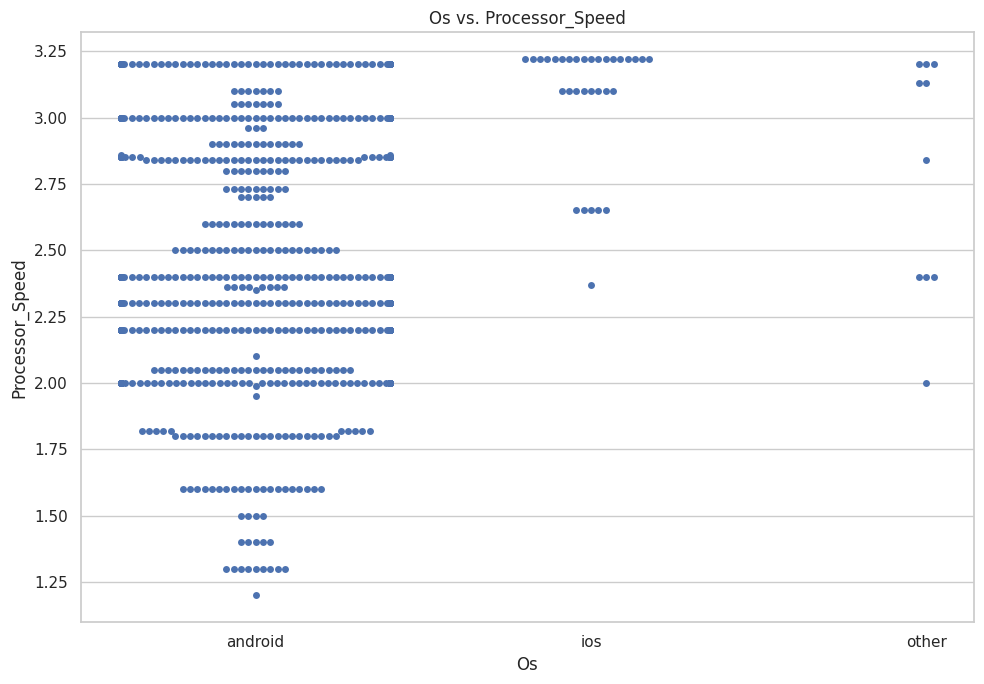

In [396]:
# OS vs. Speed
x_var = 'os'
y_var = 'processor_speed'

# Plot
plt.figure(figsize=(10,7))
sns.swarmplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

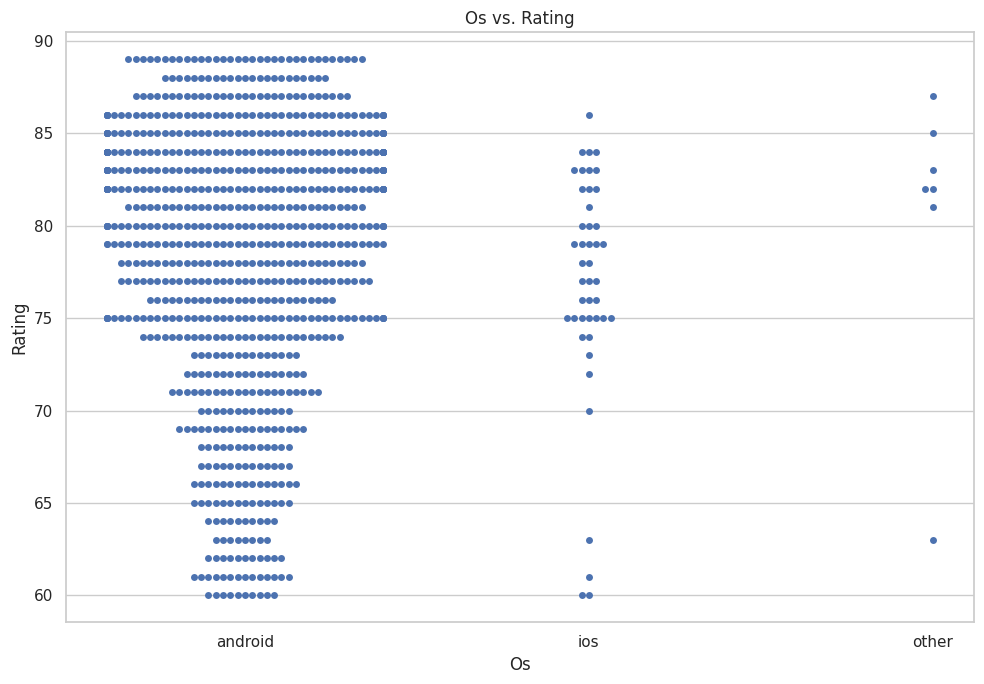

In [397]:
# OS vs. Rating
x_var = 'os'
y_var = 'rating'

# Plot
plt.figure(figsize=(10,7))
sns.swarmplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

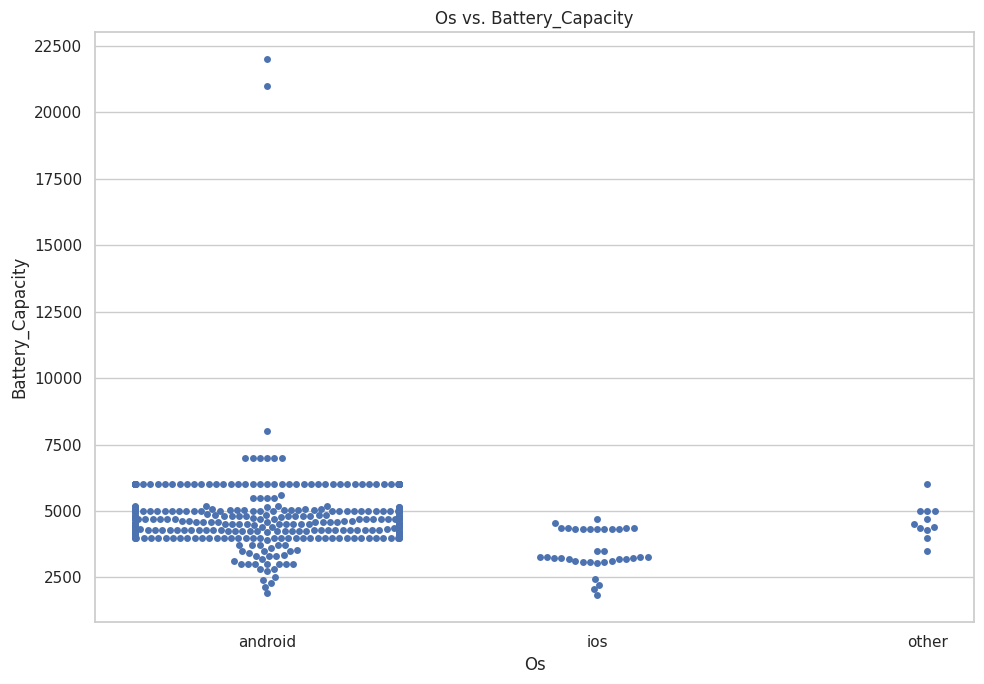

In [398]:
# OS vs. Battery
x_var = 'os'
y_var = 'battery_capacity'

# Plot
plt.figure(figsize=(10,7))
sns.swarmplot(data=phone_data, x=x_var, y=y_var)
plt.plot()

# Legends, Axis, and Title
plt.title(f'{x_var.title()} vs. {y_var.title()}')
plt.xlabel(x_var.title())
plt.ylabel(y_var.title())

# Output
plt.tight_layout()
plt.savefig(f'{x_var.title()} vs. {y_var.title()}.png', dpi=400)

plt.show()

# **Specs Distribution**

We provide distribution of the specs to determine what are the expected values of specs.

Mean: 32520.504081632655
Median: 19994.5
Mode: 14999


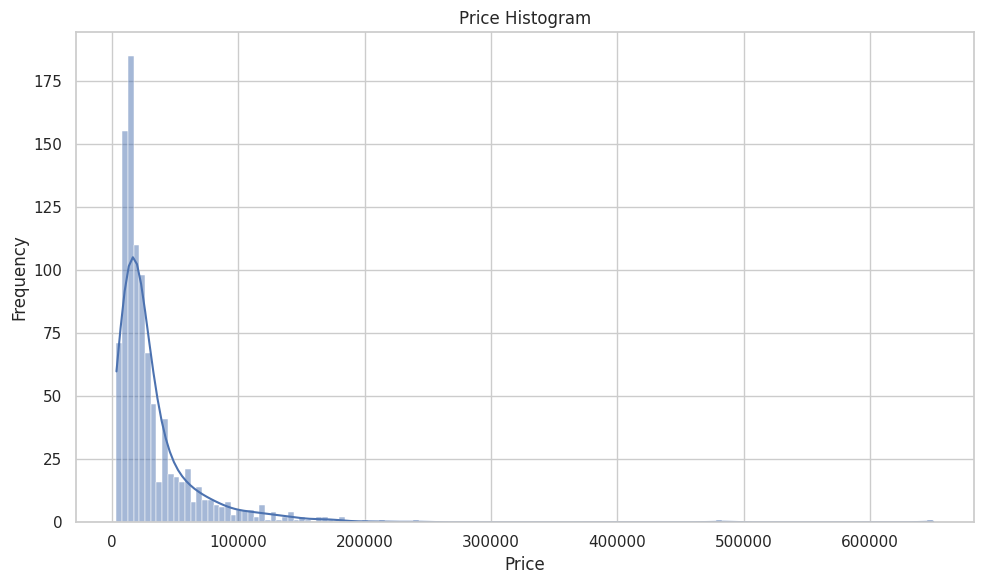

In [418]:
# Price Distribution
spec = 'price'

# Summary Stats
print(f'Mean: {phone_data[spec].mean()}')
print(f'Median: {phone_data[spec].median()}')
print(f'Mode: {phone_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(phone_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram.png', dpi=400)

plt.show()

Mean: 78.25824800910125
Median: 80.0
Mode: 84.0


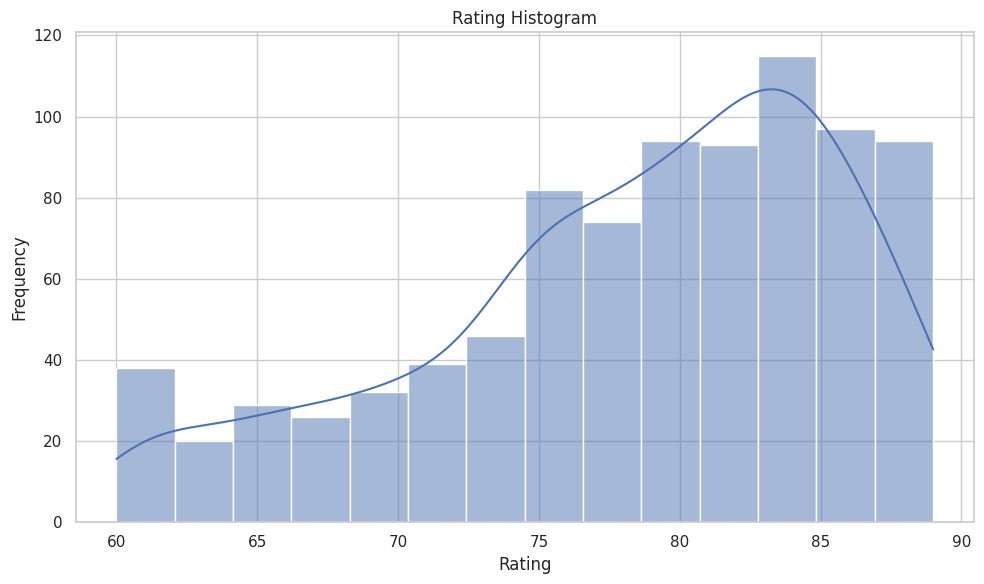

In [419]:
# Rating Distribution
spec = 'rating'

# Summary Stats
print(f'Mean: {phone_data[spec].mean()}')
print(f'Median: {phone_data[spec].median()}')
print(f'Mode: {phone_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(phone_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram.png', dpi=400)

plt.show()

Mean: 2.427217484008529
Median: 2.3
Mode: 2.0


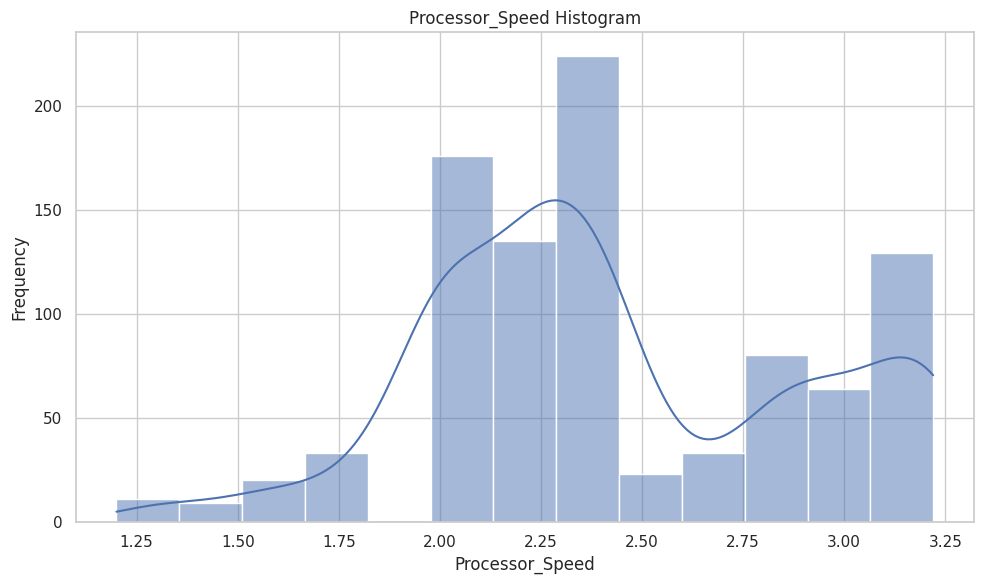

In [417]:
# Speed Distribution
spec = 'processor_speed'

# Summary Stats
print(f'Mean: {phone_data[spec].mean()}')
print(f'Median: {phone_data[spec].median()}')
print(f'Mode: {phone_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(phone_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram.png', dpi=400)

plt.show()

Mean: 4817.748194014448
Median: 5000.0
Mode: 5000.0


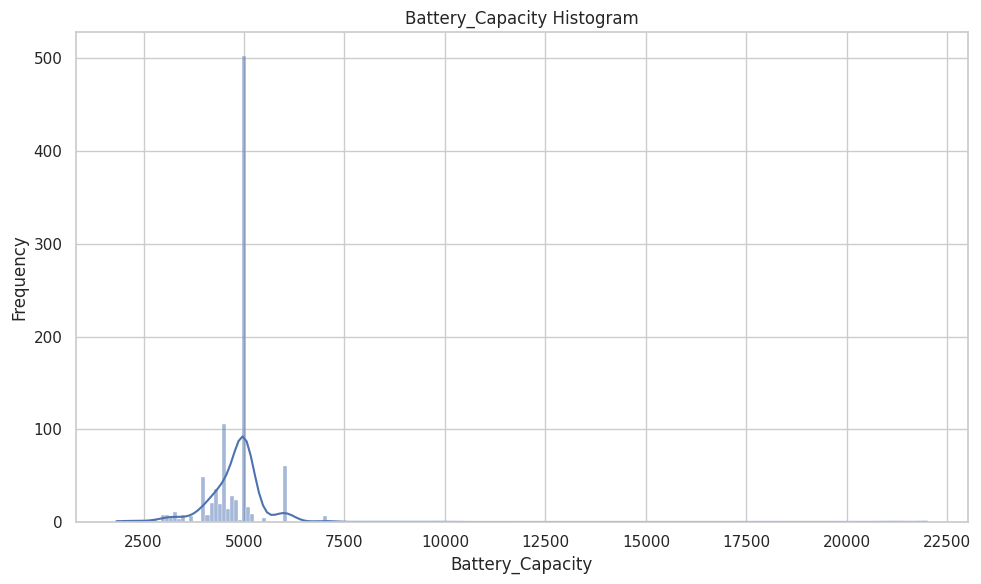

In [420]:
# Battery Capacity
spec = 'battery_capacity'

# Summary Stats
print(f'Mean: {phone_data[spec].mean()}')
print(f'Median: {phone_data[spec].median()}')
print(f'Mode: {phone_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(phone_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram.png', dpi=400)

plt.show()

# **Some Interesting Plots**

We provide some interesting figures and plots of the dataset.

## **Android vs. Apple**

Some specs comparing the android and apple's OS.

In [422]:
# Apple's iOS
ios_data = phone_data[phone_data.os == 'ios']

# Android OS
android_data = phone_data[phone_data.os == 'android']

Mean: 95966.52173913043
Median: 84994.5
Mode: 55999


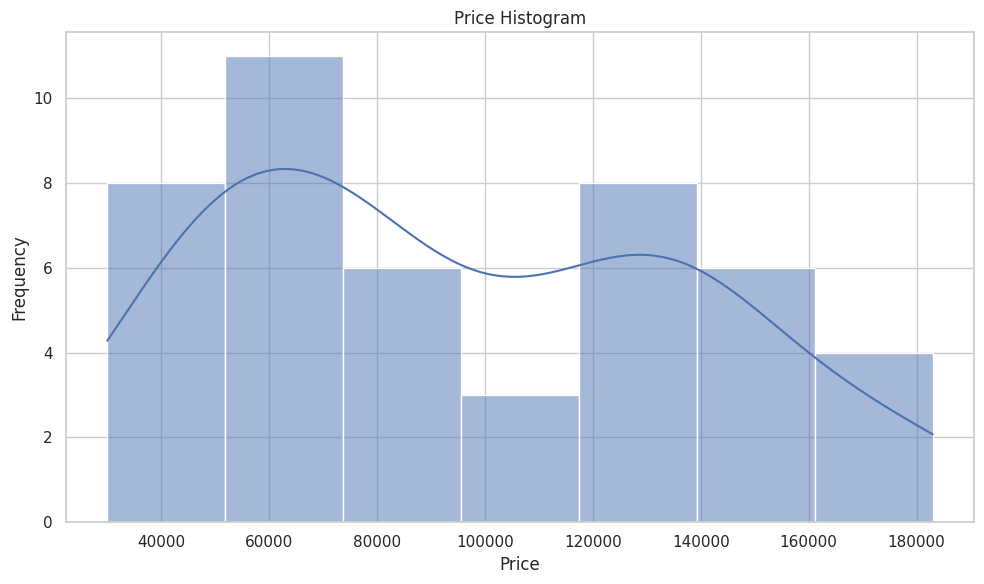

In [423]:
# Price of iOS
spec = 'price'

# Summary Stats
print(f'Mean: {ios_data[spec].mean()}')
print(f'Median: {ios_data[spec].median()}')
print(f'Mode: {ios_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(ios_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram (iOS).png', dpi=400)

plt.show()

Mean: 27991.861386138615
Median: 18999.0
Mode: 14999


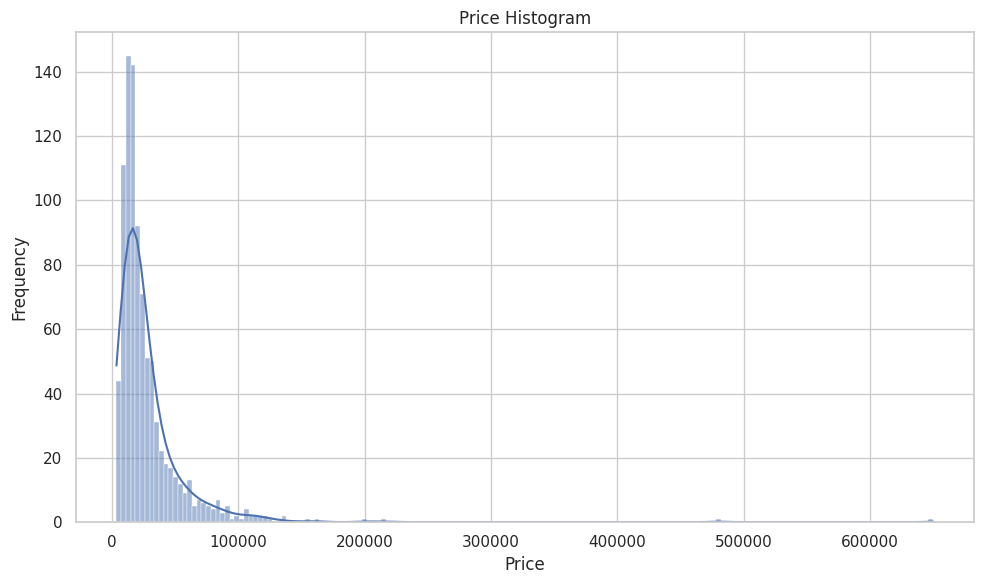

In [424]:
# Price of Android
spec = 'price'

# Summary Stats
print(f'Mean: {android_data[spec].mean()}')
print(f'Median: {android_data[spec].median()}')
print(f'Mode: {android_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(android_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram (Android).png', dpi=400)

plt.show()

Mean: 3.074375
Median: 3.22
Mode: 3.22


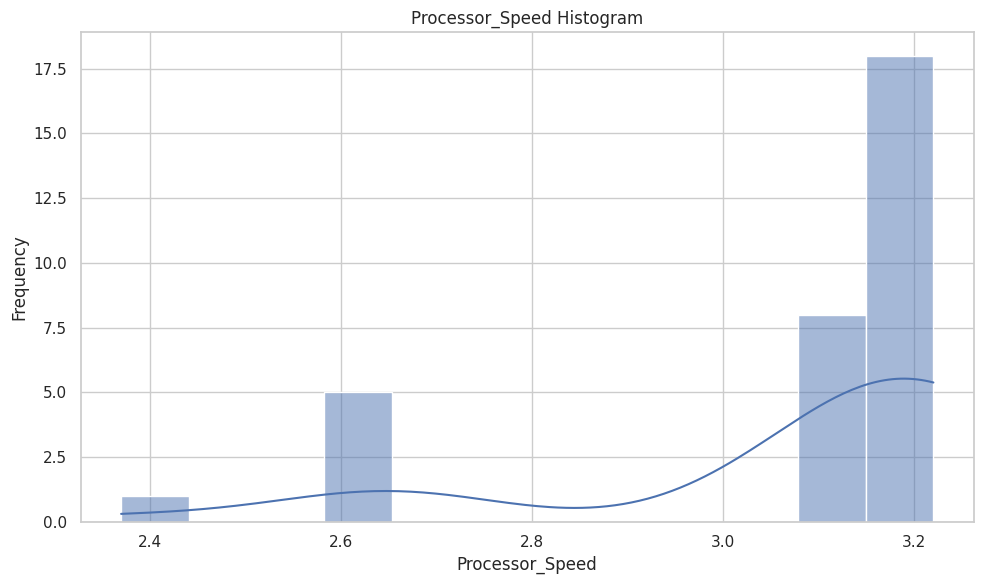

In [425]:
# Speed of iOS
spec = 'processor_speed'

# Summary Stats
print(f'Mean: {ios_data[spec].mean()}')
print(f'Median: {ios_data[spec].median()}')
print(f'Mode: {ios_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(ios_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram (iOS).png', dpi=400)

plt.show()

Mean: 2.3941496598639453
Median: 2.3
Mode: 2.0


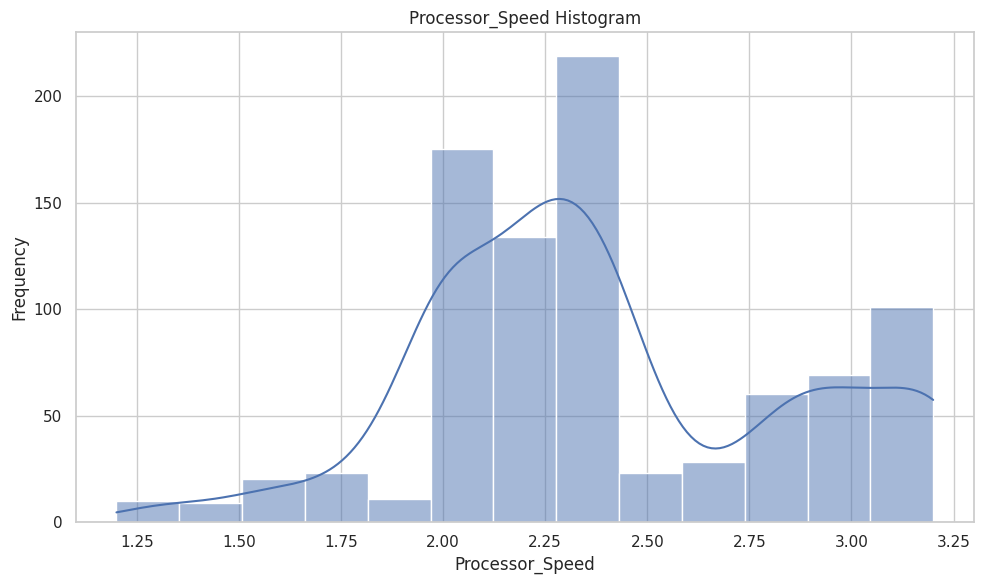

In [426]:
# Speed of Android
spec = 'processor_speed'

# Summary Stats
print(f'Mean: {android_data[spec].mean()}')
print(f'Median: {android_data[spec].median()}')
print(f'Mode: {android_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(android_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram (Android).png', dpi=400)

plt.show()

Mean: 3527.2285714285713
Median: 3279.0
Mode: 4323.0


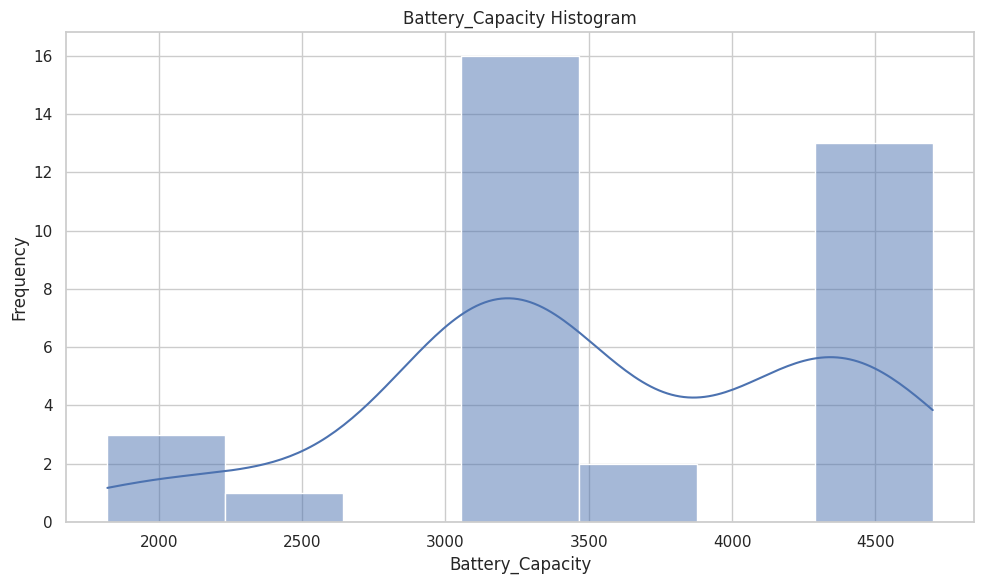

In [427]:
# Battery of iOS
spec = 'battery_capacity'

# Summary Stats
print(f'Mean: {ios_data[spec].mean()}')
print(f'Median: {ios_data[spec].median()}')
print(f'Mode: {ios_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(ios_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram (iOS).png', dpi=400)

plt.show()

Mean: 4873.877887788779
Median: 5000.0
Mode: 5000.0


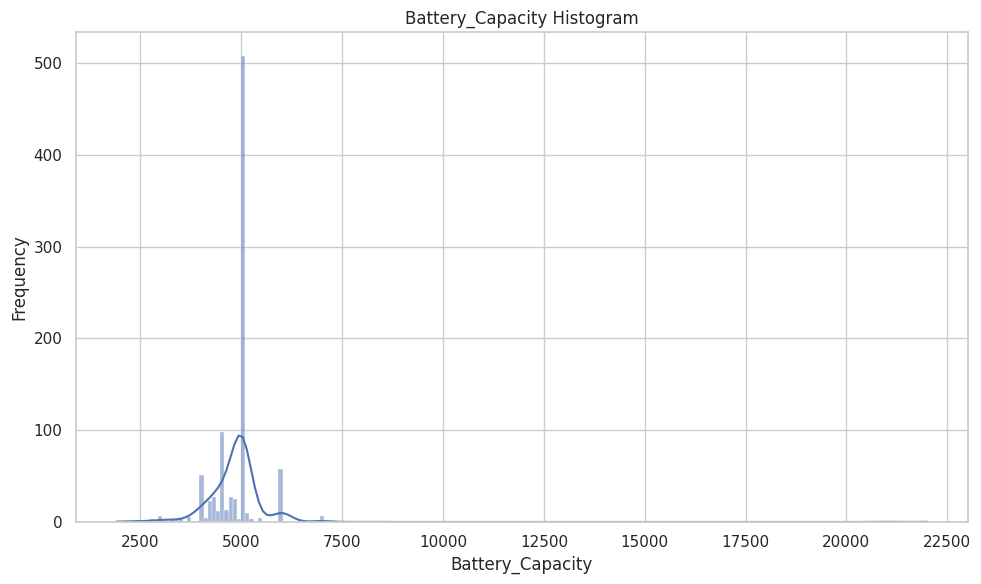

In [428]:
# Battery of Android
spec = 'battery_capacity'

# Summary Stats
print(f'Mean: {android_data[spec].mean()}')
print(f'Median: {android_data[spec].median()}')
print(f'Mode: {android_data[spec].mode()[0]}')

# Plot
plt.figure(figsize=(10,6))
sns.histplot(android_data[spec], kde=True)

# Legends, Axis, and Title
plt.title(f'{spec.title()} Histogram')
plt.xlabel(spec.title())
plt.ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig(f'{spec.title()} Histogram (Android).png', dpi=400)

plt.show()